# Matplotlib 101

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
print("Matplotlib version", mpl.__version__)

Matplotlib version 3.1.0


In [63]:
# Magic 키워드 설정
# 참고 : https://ipython.readthedocs.io/en/stable/interactive/magics.html

## matplotlib의 그림을 내부에 표시하도록 설정
%matplotlib inline
#그래프를 더 높은 해상도로 보여주는 설정
%config InlineBackend.figure_format = 'retina'

## Plot 그리기 및 설정

### Plot 그리기

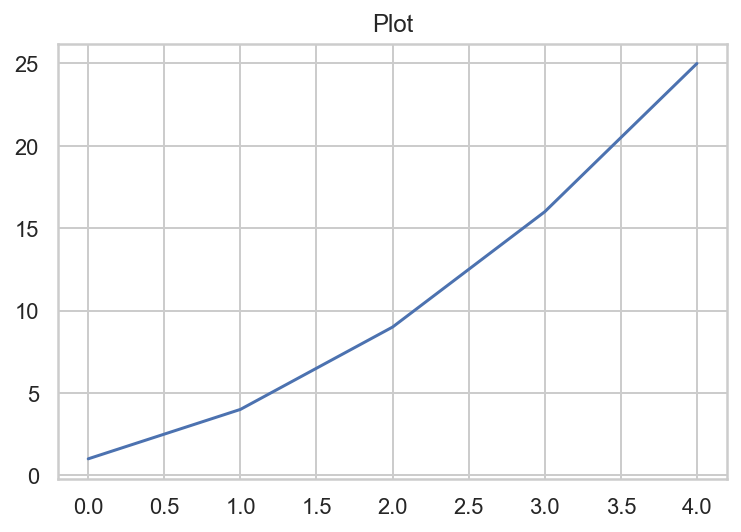

In [64]:
plt.title("Plot")
plt.plot([1, 4, 9, 16, 25])

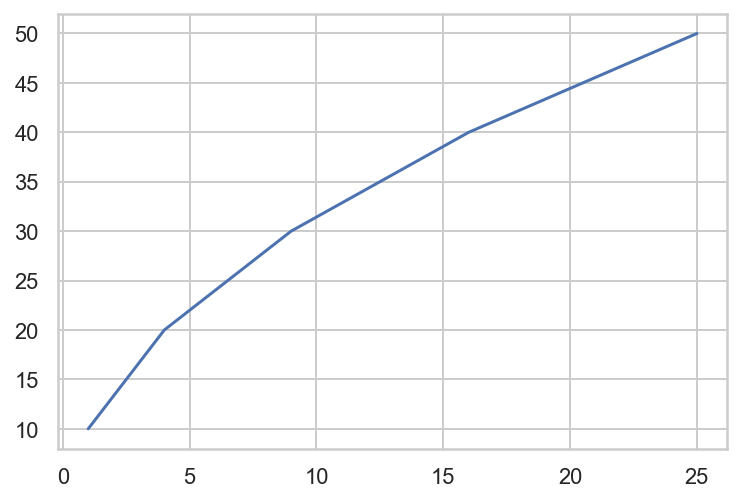

In [65]:
plt.plot([1, 4, 9, 16, 25], [10, 20, 30, 40, 50])

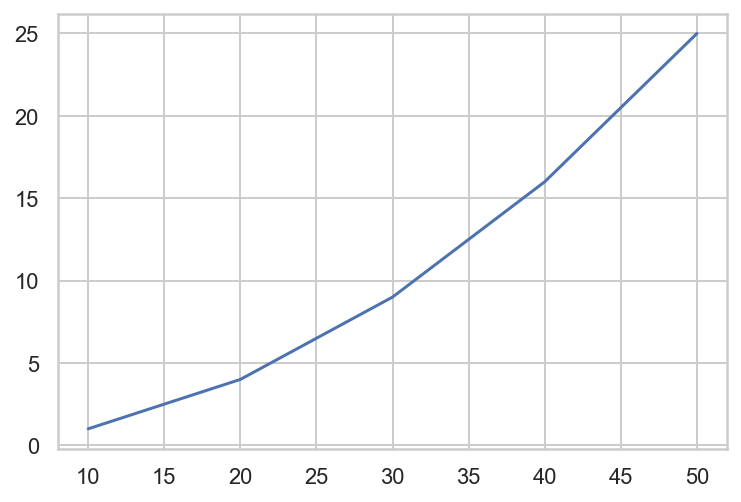

In [66]:
plt.plot([10, 20, 30, 40, 50], [1, 4, 9, 16, 25])
plt.show()

### Plot 세부 설정

In [67]:
x, y = [10, 20, 30, 40, 50], [1, 4, 9, 16, 25]

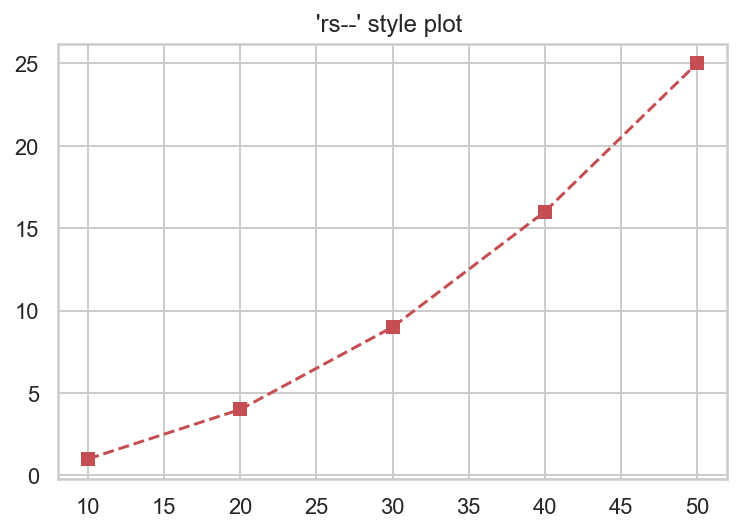

In [68]:
# 스타일 지정하기
plt.title("'rs--' style plot ")
plt.plot(x, y , 'rs--')
plt.show()

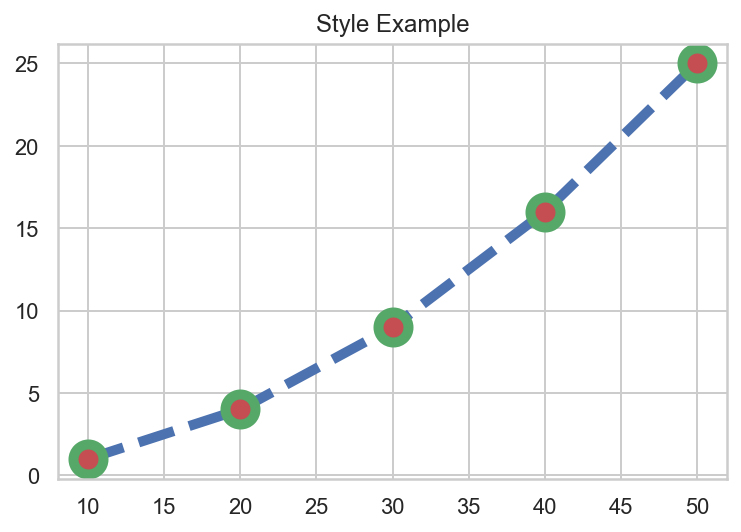

In [69]:
# 스타일 세부 적용하기
plt.plot(x, y,
         c="b",      # 선 색깔
         lw=5,       # 선 굵기
         ls="--",    # 선 스타일
         marker="o", # 마커 종류
         ms=15,      # 마커 크기
         mec="g",    # 마커 선 색깔
         mew=5,      # 마커 선 굵기
         mfc="r"     # 마커 내부 색깔
        )
plt.title("Style Example")
plt.show()

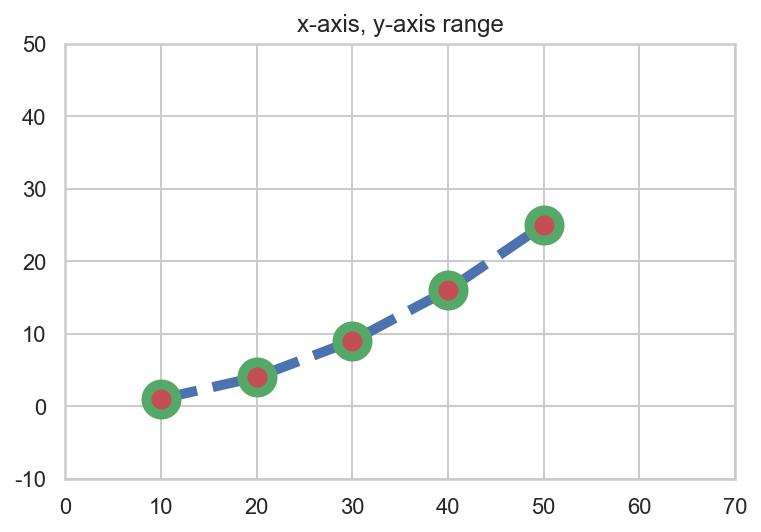

In [70]:
plt.title("x-axis, y-axis range")
plt.plot(x, y,
         c="b", lw=5, ls="--", marker="o", ms=15, mec="g", mew=5, mfc="r")

# plot의 x축, y축 지정하기
plt.xlim(0, 70)
plt.ylim(-10, 50)
plt.show()

### tick(눈금) 정하기

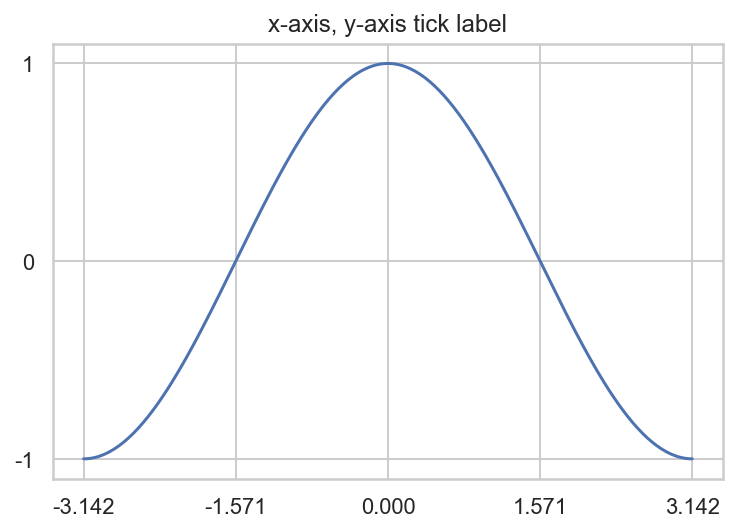

In [71]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.cos(x)

plt.title("x-axis, y-axis tick label")
plt.plot(x, y)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])

plt.show()

### 여러 선 그리기

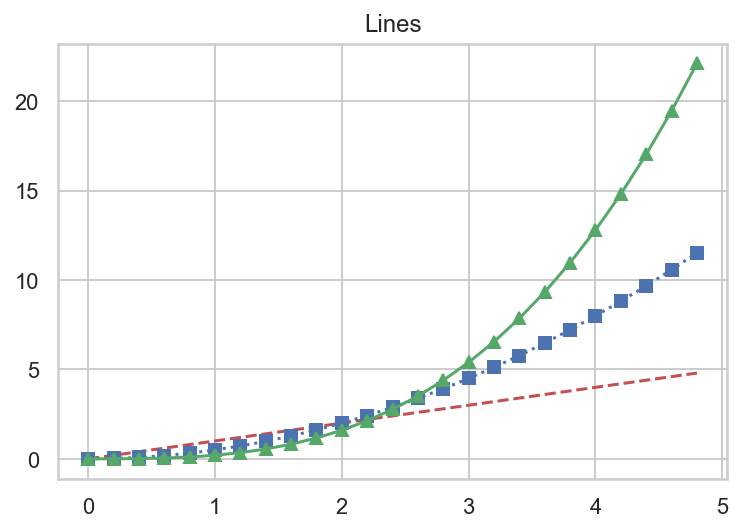

In [72]:
# 0 ~ 5사이에 0.2씩 증가하는 데이터 생성
t = np.arange(0., 5., 0.2)

plt.title("Lines")
plt.plot(
    t, t, 'r--',          # y=x 형태
    t, 0.5 * t**2, 'bs:', # y=x^2 형태
    t, 0.2 * t**3, 'g^-'  # y=x^3 형태
)
plt.show()

### legend(범례) 추가하기

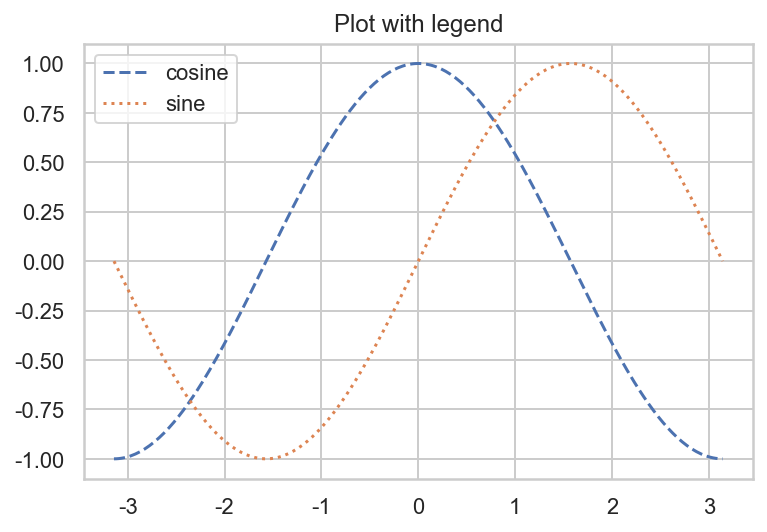

In [73]:
x = np.linspace(-np.pi, np.pi, 256)
cos = np.cos(x)
sin = np.sin(x)

plt.title("Plot with legend")
plt.plot(x, cos, ls="--", label="cosine")
plt.plot(x, sin, ls=":", label="sine")

# legend 추가
plt.legend()
plt.show()

### x축, y축 제목 추가하기

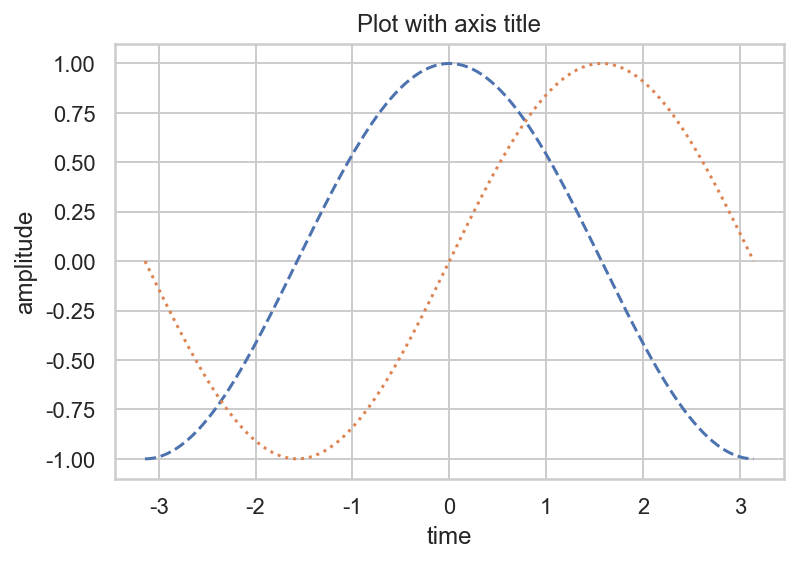

In [74]:
x = np.linspace(-np.pi, np.pi, 256)
cos = np.cos(x)
sin = np.sin(x)

plt.title("Plot with legend")
plt.plot(x, cos, ls="--", label="cosine")
plt.plot(x, sin, ls=":", label="sine")

plt.xlabel("time")
plt.ylabel("amplitude")
plt.title("Plot with axis title")
plt.show()

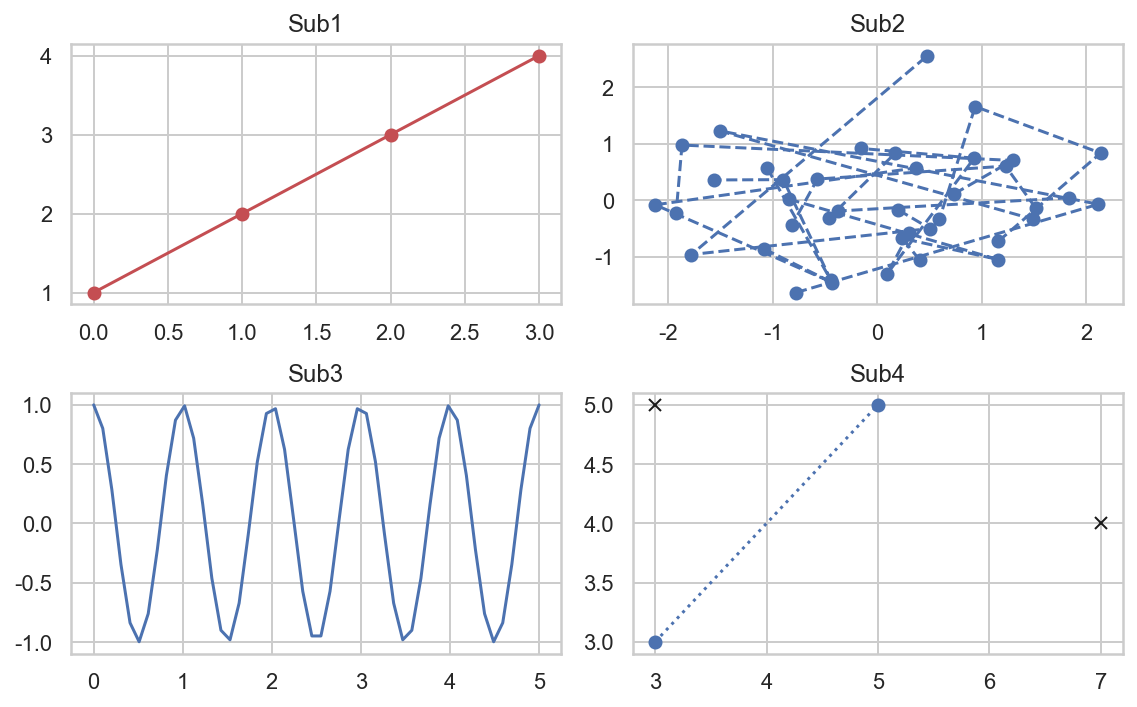

In [75]:
fig, ax_lst = plt.subplots(2, 2, figsize=(8,5))
ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][0].set_title("Sub1")

ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[0][1].set_title("Sub2")

ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][0].set_title("Sub3")

ax_lst[1][1].set_title("Sub4")
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')


fig.tight_layout()

## Pandas DataFrame을 이용하여 Plot 그리기

In [76]:
# 무작위로 DataFrame 생성
np.random.seed(1216) # 난수 생성의 seed를 고정하여 동일한 난수 생성 가능

# DataFrame 생성
df = pd.DataFrame(np.random.randn(4,4))

In [77]:
# DataFrame 확인
df

,0,1,2,3
0,1.551687,-0.925175,-0.014353,0.221347
1,0.155941,0.503064,-0.783434,0.774140
2,0.187852,-0.855129,-0.372012,-1.124544
3,1.100896,1.224289,0.608389,-0.184480


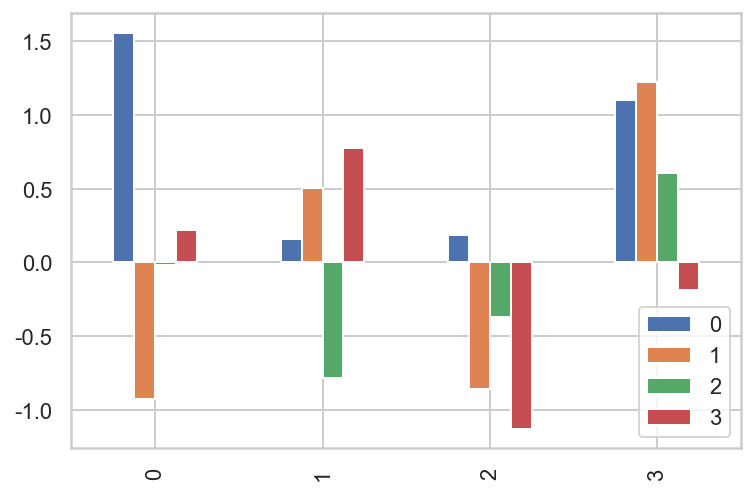

In [78]:
df.plot(kind='bar')
plt.show()

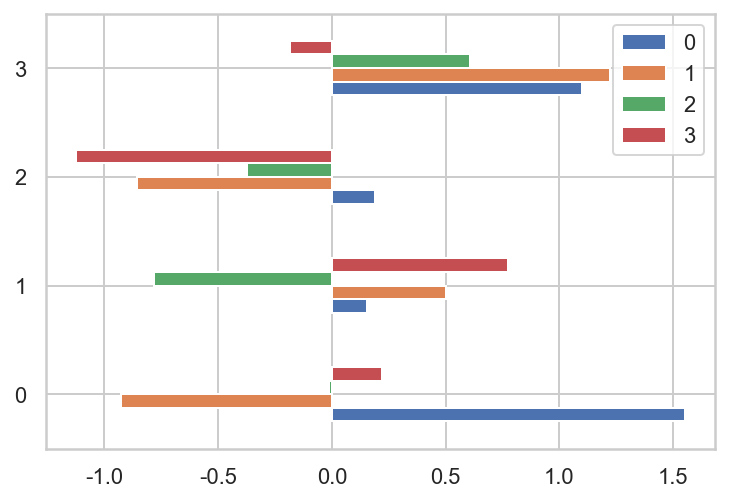

In [79]:
df.plot(kind='barh')
plt.show()

# Seaborn 맛보기

In [80]:
import seaborn as sns
print("Seaborn version : ", sns.__version__)
sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

Seaborn version :  0.9.0


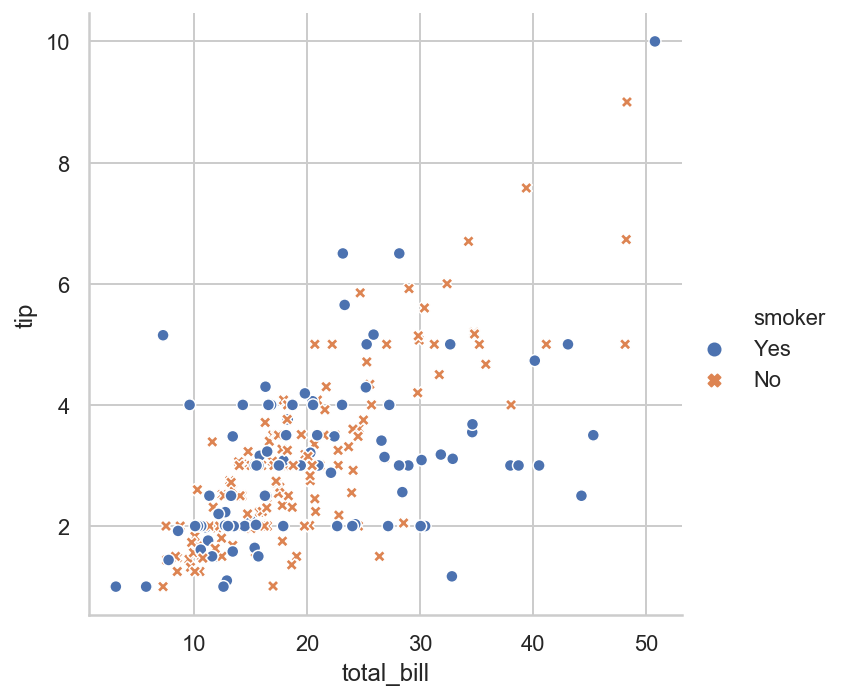

In [81]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)
plt.show()

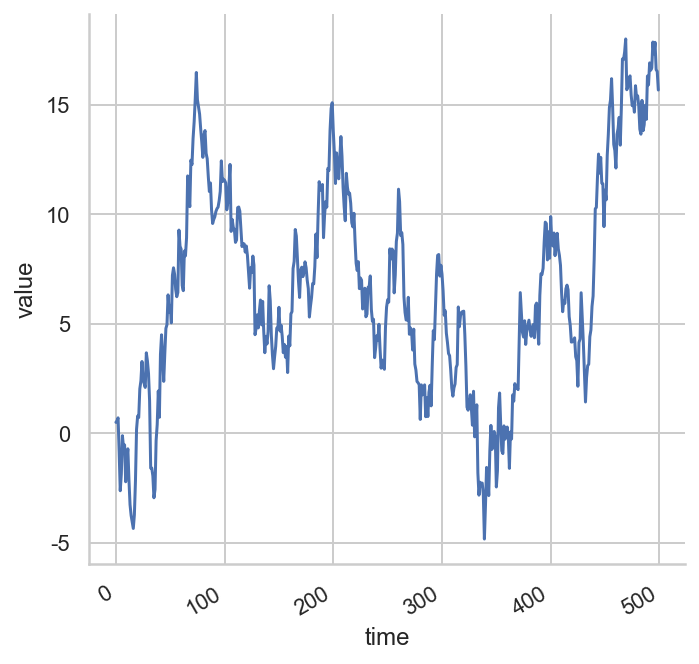

In [82]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()
plt.show()

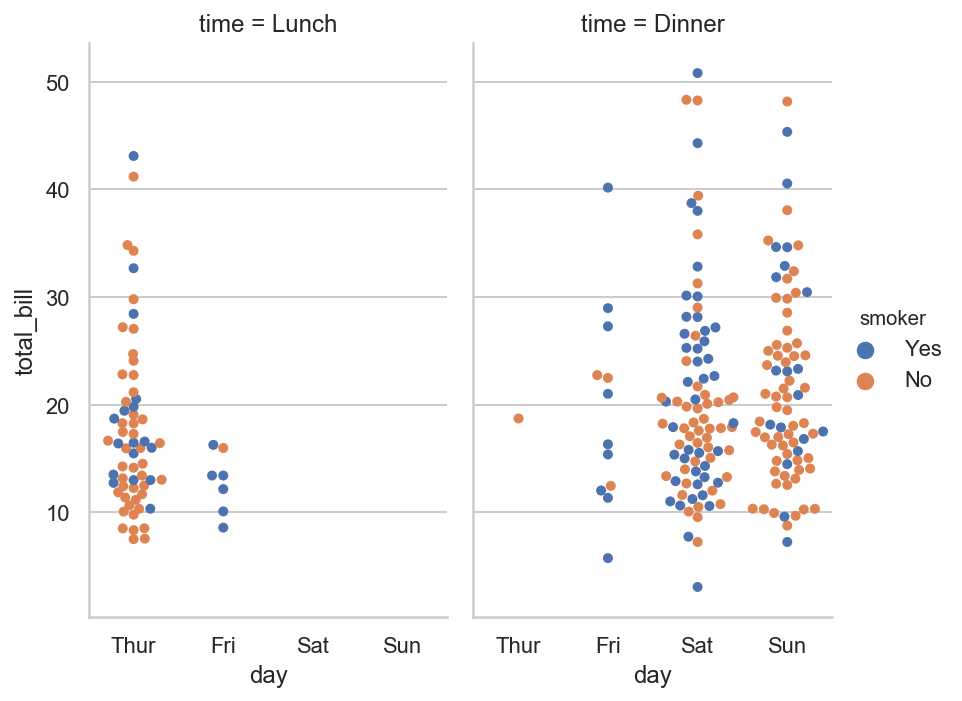

In [83]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips)
plt.show()

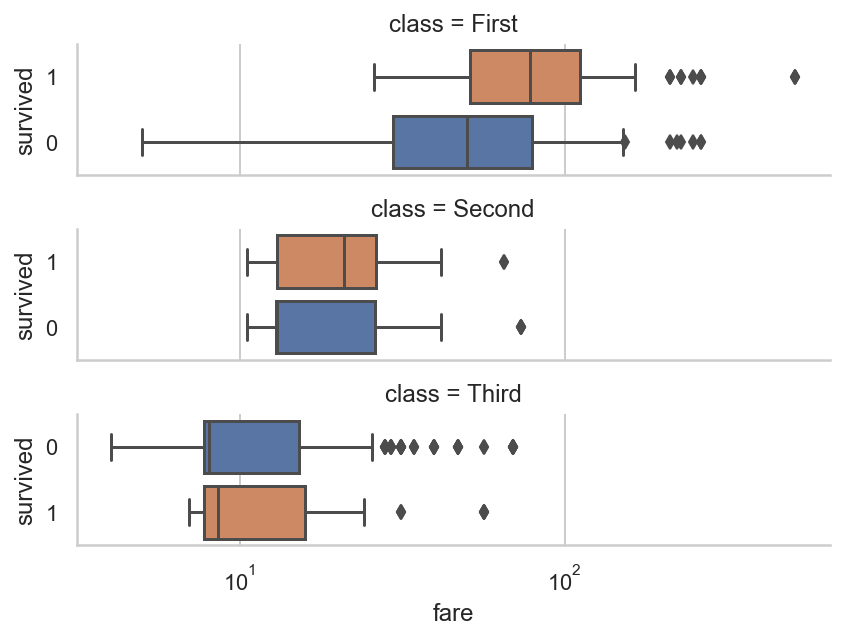

In [84]:
titanic = sns.load_dataset("titanic")
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log")
plt.show()

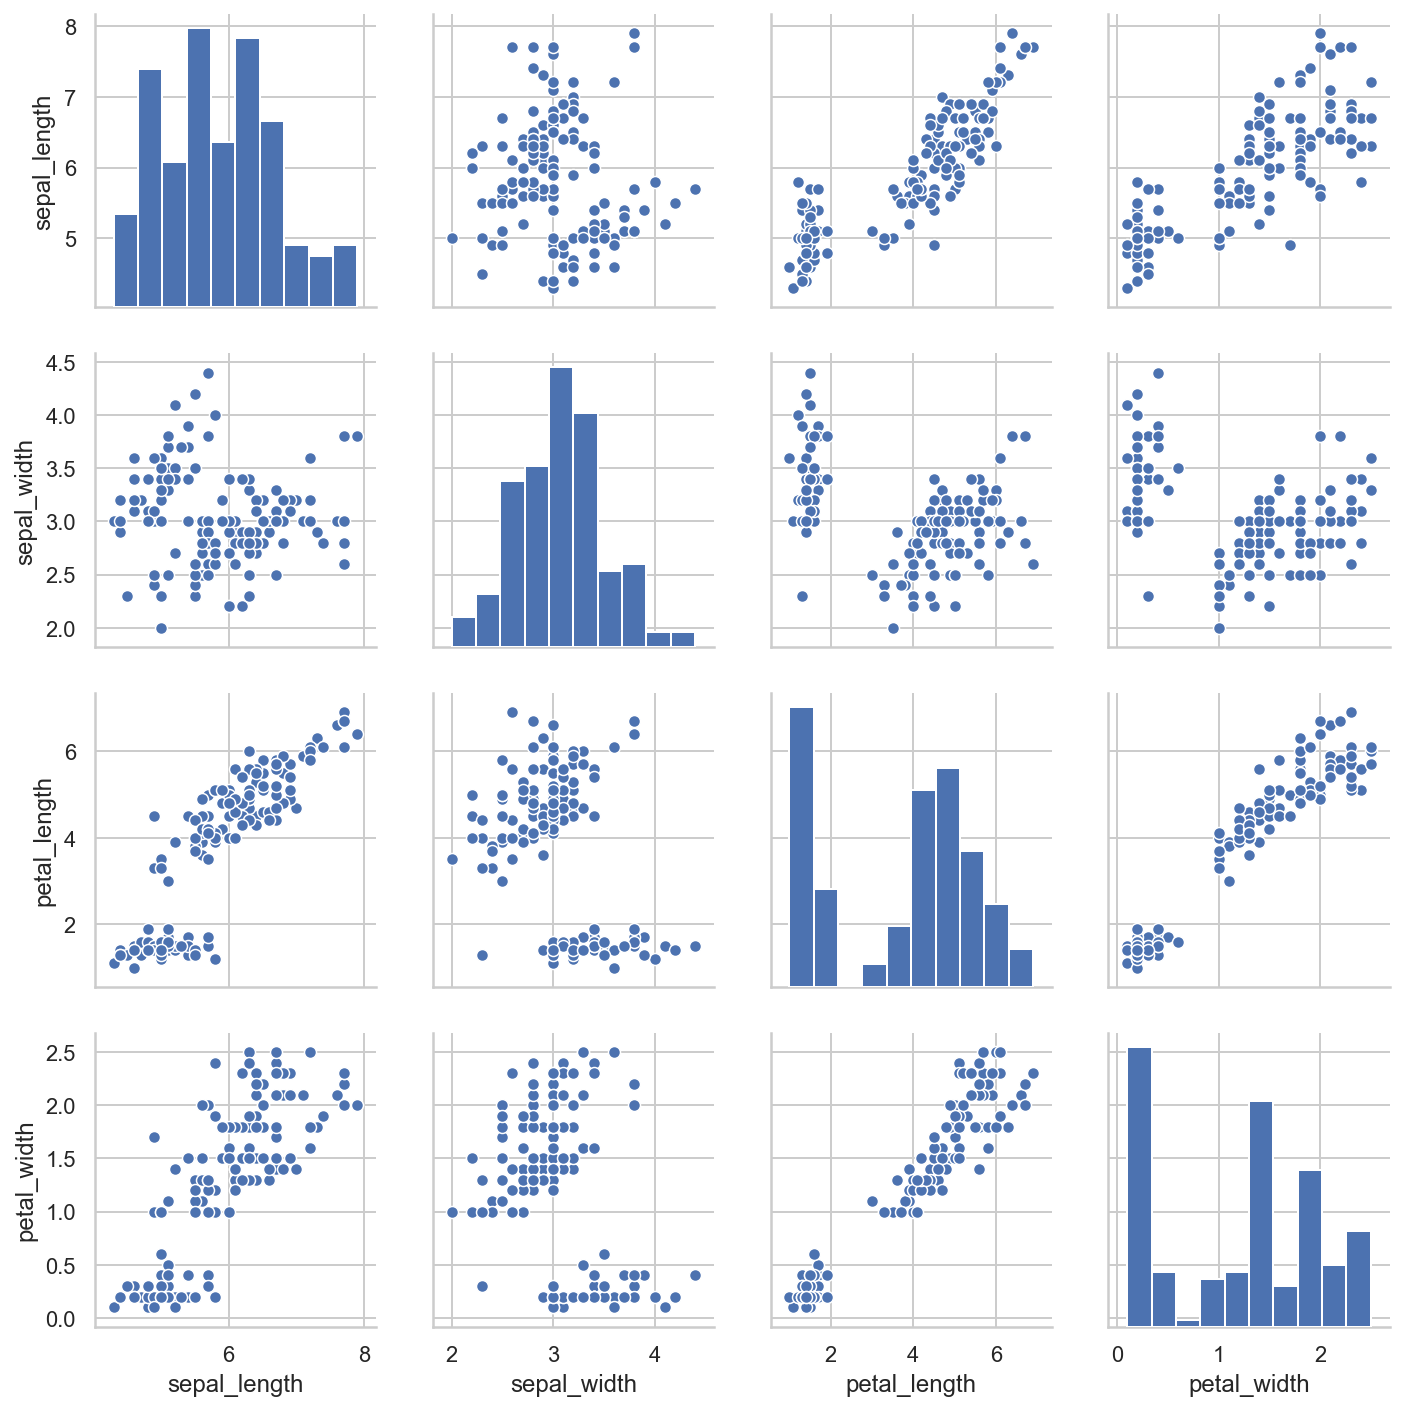

In [85]:
iris = sns.load_dataset("iris")
sns.pairplot(iris)
plt.show()

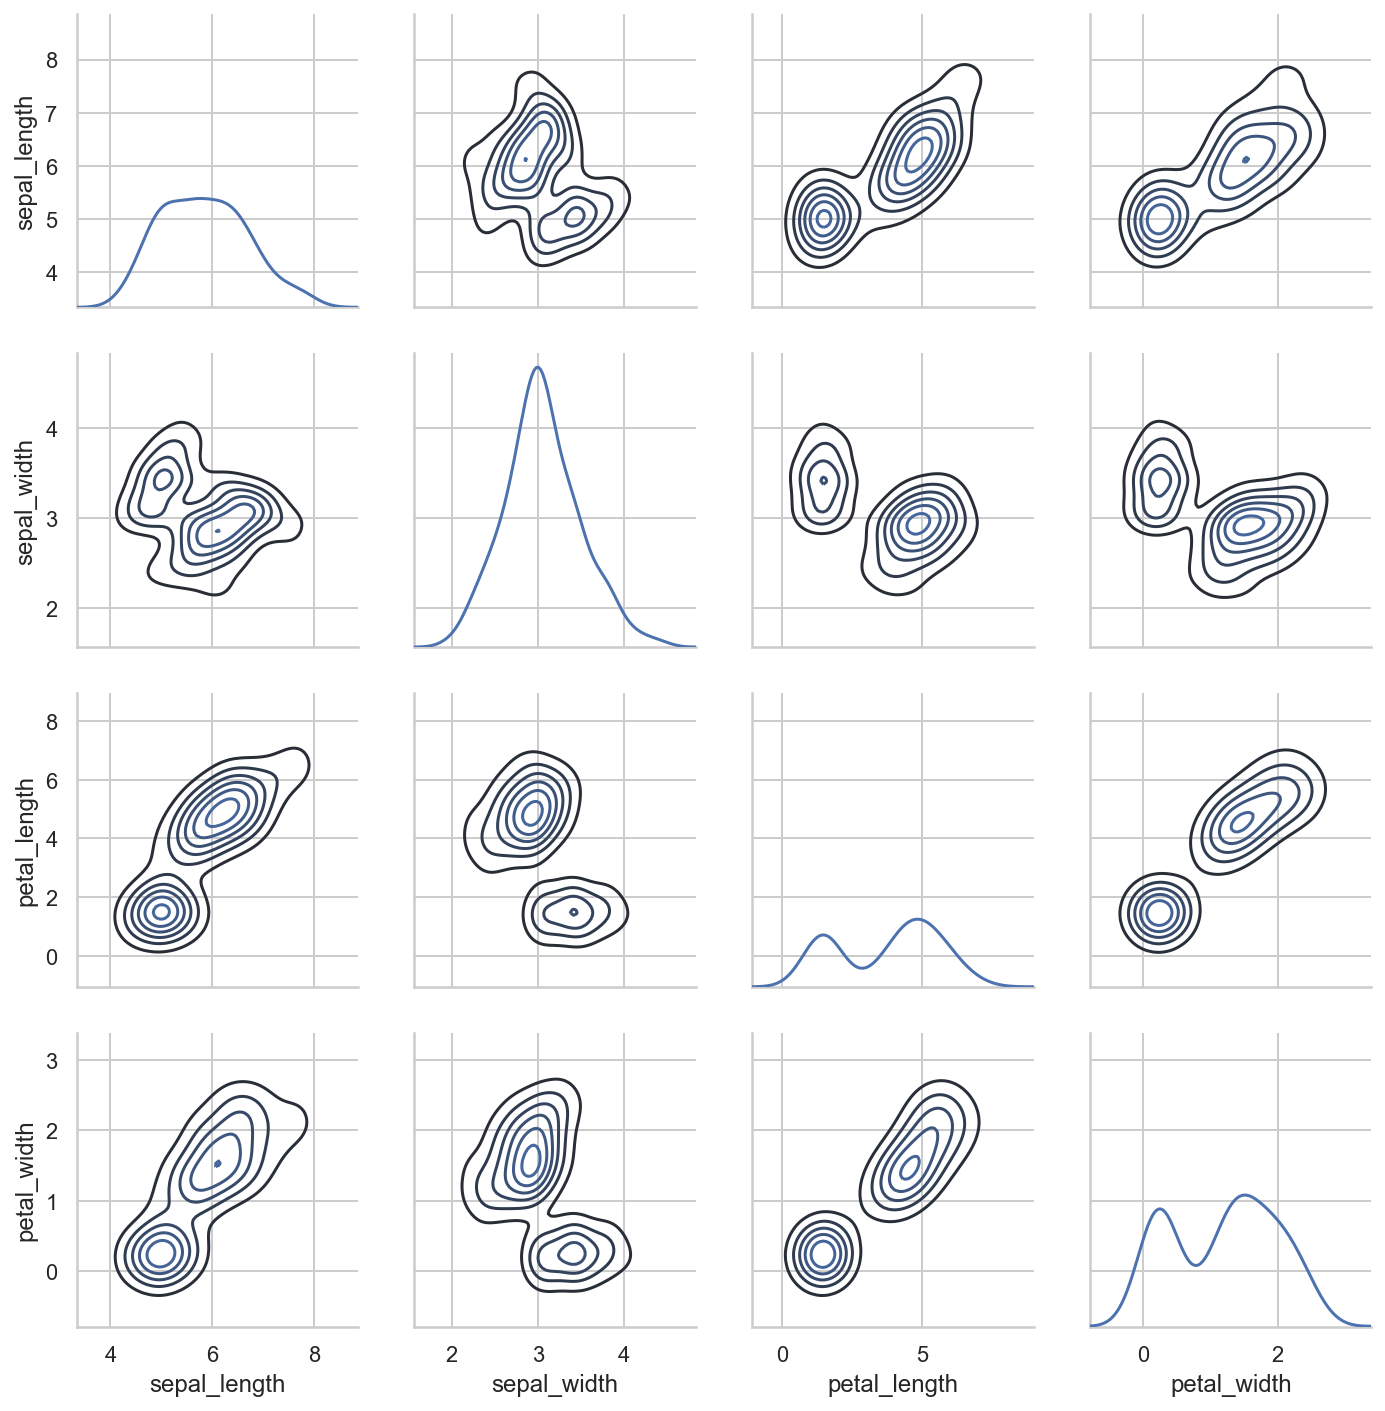

In [86]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)
plt.show()

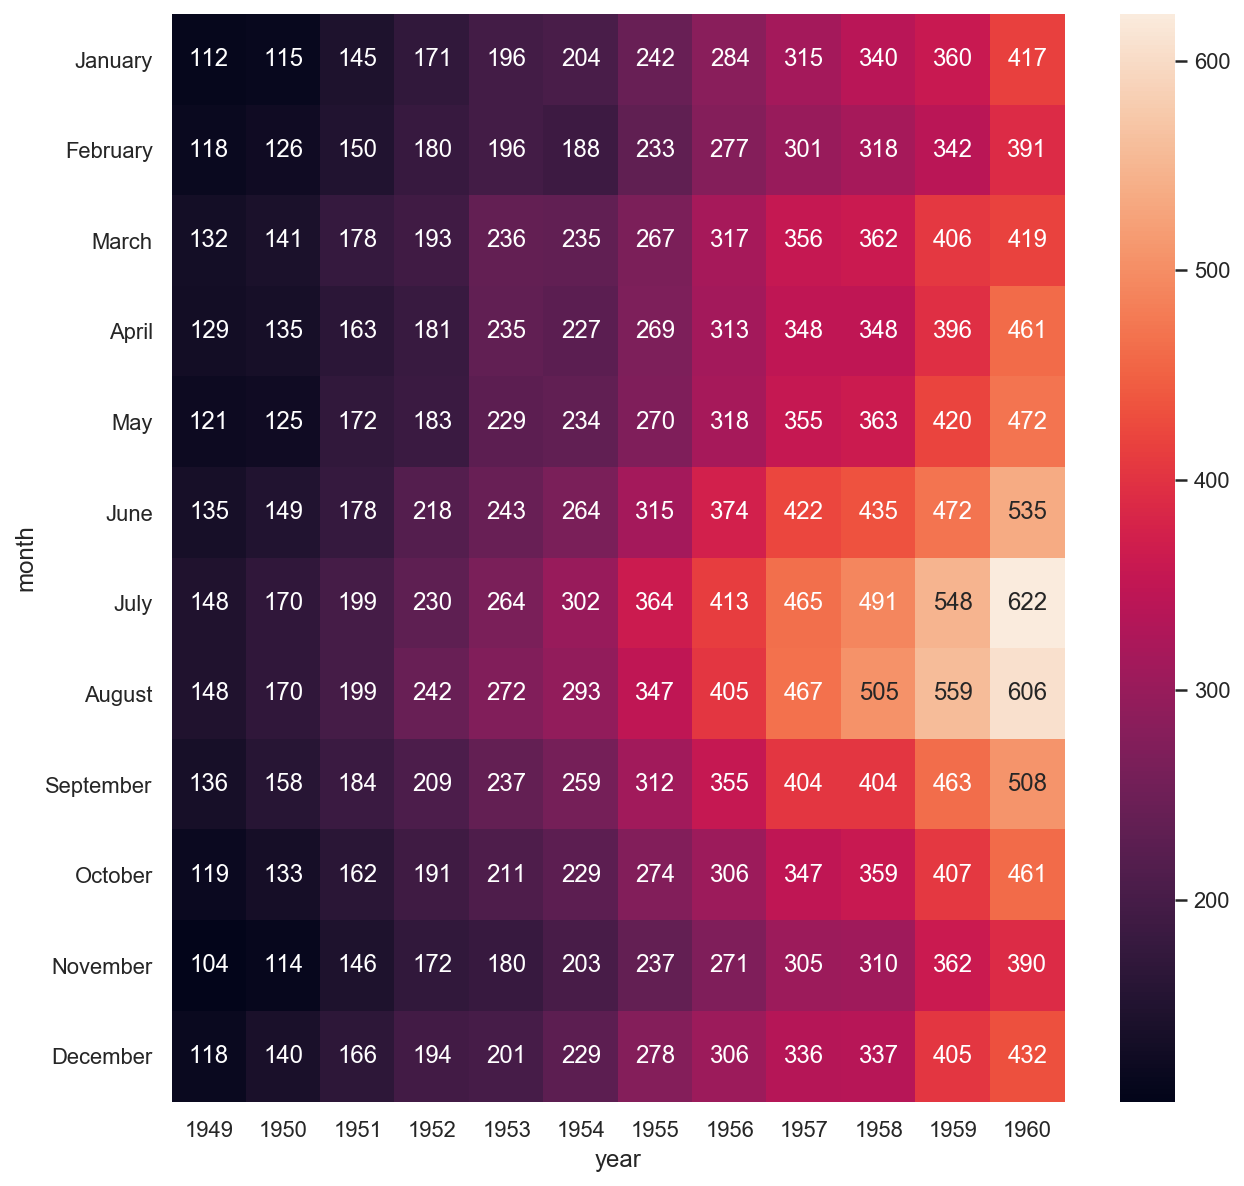

In [87]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 10))
ax = sns.heatmap(flights, annot=True, fmt="d")
plt.show()